<a href="https://colab.research.google.com/github/conscioustahoe/mouse-sleep-analysis/blob/main/state_transition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Python 3.8

See [stackoverflow](https://stackoverflow.com/a/70993829)

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!conda install python=3.8
!python --version

## Install forceatlas2

In [ ]:
!git clone https://github.com/bhargavchippada/forceatlas2.git

In [1]:
%cd forceatlas2
%ls -lrth

/content/forceatlas2
total 264K
-rw-r--r-- 1 root root 6.7K Mar 21 15:27 README.md
-rw-r--r-- 1 root root   64 Mar 21 15:27 MANIFEST.in
-rw-r--r-- 1 root root  35K Mar 21 15:27 LICENSE
drwxr-xr-x 2 root root 4.0K Mar 21 15:27 examples/
-rw-r--r-- 1 root root 2.7K Mar 21 15:27 setup.py
drwxr-xr-x 5 root root 4.0K Mar 21 15:28 build/
drwxr-xr-x 2 root root 4.0K Mar 21 15:29 fa2.egg-info/
drwxr-xr-x 3 root root 4.0K Mar 21 15:29 fa2/
-rw-r--r-- 1 root root 195K Mar 21 15:32 latentStates.npz


In [ ]:
!pip install . --user

In [ ]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

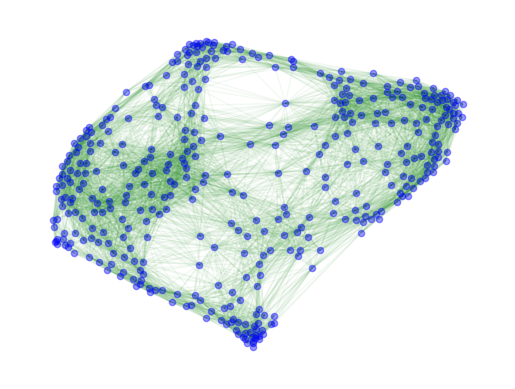

In [4]:
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

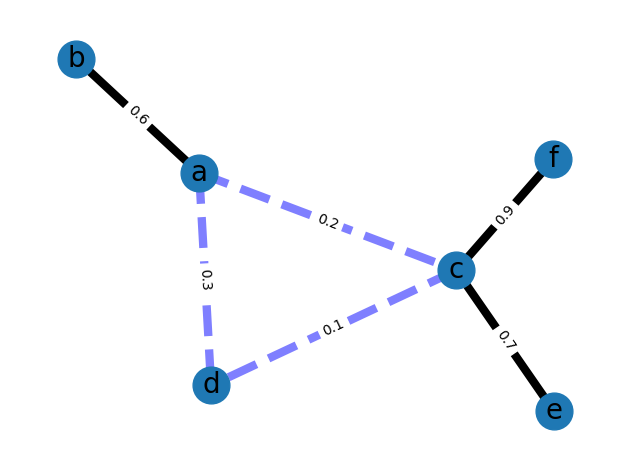

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.io import loadmat

In [3]:
latent_states = np.load('latentStates.npz')

In [4]:
inferredStates = latent_states['inferredStates']
uniqueStates = latent_states['uniqueStates']

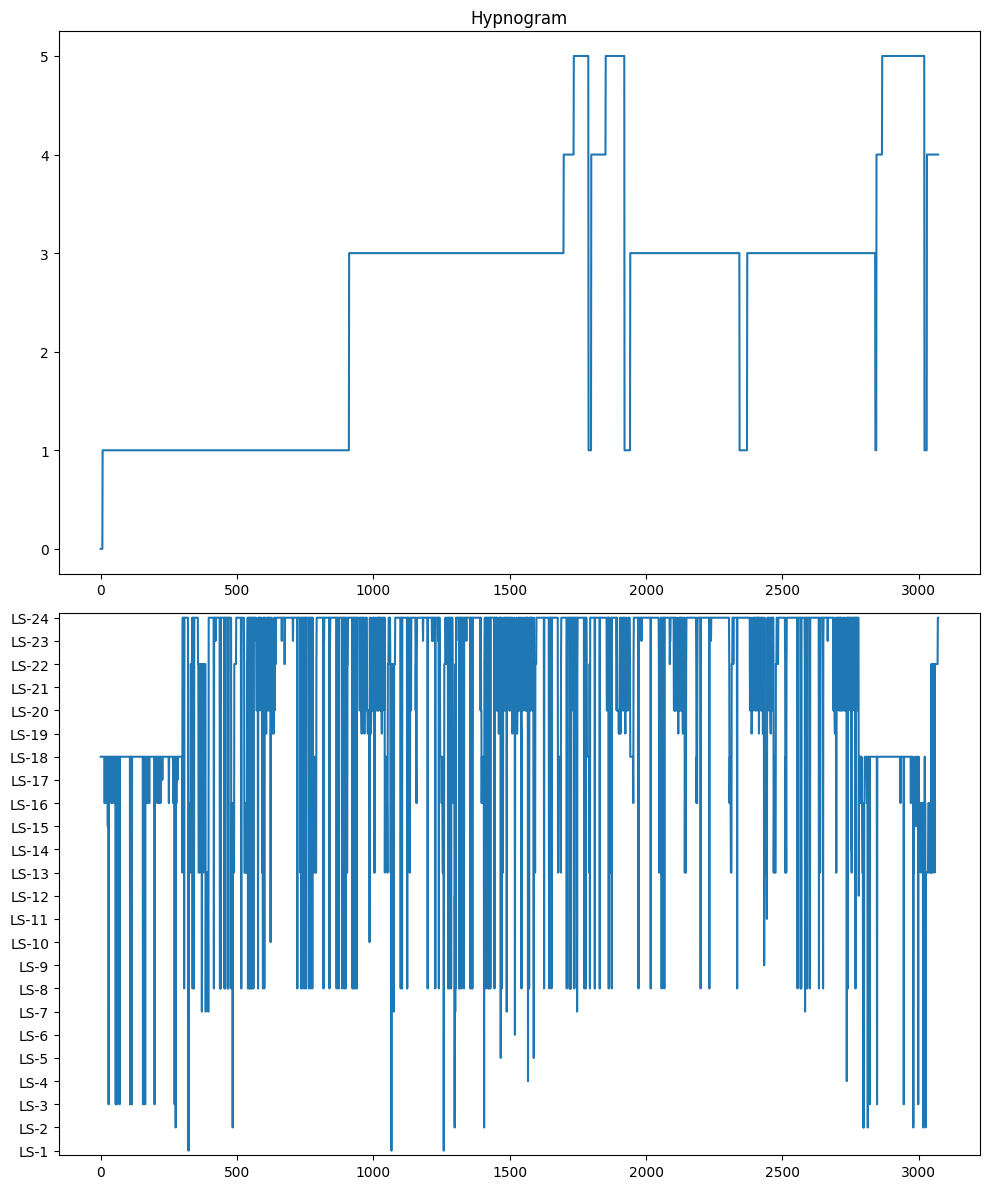

In [5]:
manualStates = inferredStates[:, 1]
latentStates = inferredStates[:, 0]
nLS = uniqueStates.shape[0]

LS = [f"LS-{i+1}" for i in range(nLS)]

hypnogram = plt.figure(figsize=(10, 12), dpi=100, tight_layout=True)
plt.subplot(2, 1, 1)
plt.title('Hypnogram')
plt.plot(manualStates)

plt.subplot(2, 1, 2)
plt.plot(latentStates)
plt.ylim([0.8, nLS + 0.2])
plt.yticks(range(1, nLS + 1), LS)
# Adjust y-axis ticks and labels
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
# Save the plot
# plt.savefig('hypnogram.png')
# plt.close()

In [6]:
latent_states['probabilities'].shape, latent_states['binary'].shape

((3072, 21), (3072, 21))

In [7]:
latent_states['probabilities'][1]

array([8.8028330e-01, 8.8025081e-01, 8.8373369e-01, 8.8367987e-01,
       8.8407189e-01, 8.8402361e-01, 8.8388258e-01, 8.8025099e-01,
       8.8398540e-01, 8.8418955e-01, 8.8019490e-01, 9.9797994e-01,
       9.9820316e-01, 5.1420146e-05, 9.9765778e-01, 9.9955112e-01,
       9.9503618e-01, 3.8604071e-08, 9.9371558e-01, 9.9635279e-01,
       9.9874383e-01], dtype=float32)

In [8]:
latent_states['binary'][1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [9]:
latent_states['inferredStates'].shape, latent_states['uniqueStates'].shape

((3072, 2), (24, 23))

In [10]:
latent_states['inferredStates'][1]

array([18.,  0.])

In [11]:
latent_states['uniqueStates'][1]

array([ 2., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.])